## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Encoding
from sklearn.preprocessing import LabelEncoder

# Saving model
import joblib

## LOAD DATASET

In [2]:
df = pd.read_csv("../data/Engineered/BankChurners_Engineered.csv")
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income_Start,Income_End,Education_Level_Encoded,Activity_Ratio,Engagement_Score,High_Credit_Flag,Trans_Freq_Group,Tenure_Group
0,Existing Customer,45,M,3,Married,Blue,39,5,1,3,...,1.625,0.061,60000.0,80000.0,1,27.238095,84,1,Low,Medium
1,Existing Customer,49,F,5,Single,Blue,44,6,1,2,...,3.714,0.105,0.0,40000.0,3,39.121212,79,1,Low,Medium
2,Existing Customer,51,M,3,Married,Blue,36,4,1,0,...,2.333,0.000,80000.0,120000.0,3,94.350000,56,0,Low,Medium
3,Existing Customer,40,F,4,Unknown,Blue,34,3,4,1,...,2.333,0.760,0.0,40000.0,1,58.550000,55,0,Low,Medium
4,Existing Customer,40,M,3,Married,Blue,21,5,1,0,...,2.500,0.000,60000.0,80000.0,0,29.142857,49,1,Low,New


## ENCODE CATEGORICAL FEATURES (ONLY WHAT NEEDS IT)

In [8]:
df.select_dtypes(include="object").columns

Index(['Attrition_Flag', 'Gender', 'Marital_Status', 'Card_Category',
       'Trans_Freq_Group', 'Tenure_Group'],
      dtype='object')

### Encode TARGET (MANDATORY)

In [9]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({
    "Existing Customer": 0,
    "Attrited Customer": 1
})

### Encode remaining categorical columns

In [10]:
label_encoders = {}

for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## SPLIT FEATURES & TARGET

In [11]:
X = df.drop("Attrition_Flag", axis=1)
y = df["Attrition_Flag"]

## TRAIN / TEST SPLIT

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## TRAIN MODELS

### Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

d:\Programs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Decision Tree

In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Random Forest

In [15]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

## EVALUATION FUNCTION (CLEAN & REUSABLE)

In [16]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Evaluate All Models

In [18]:
print("🔹 Logistic Regression")
evaluate_model(lr, X_test, y_test)

print("🔹 Decision Tree")
evaluate_model(dt, X_test, y_test)

print("🔹 Random Forest")
evaluate_model(rf, X_test, y_test)

🔹 Logistic Regression
Accuracy: 0.8963474827245804
Precision: 0.7467811158798283
Recall: 0.5353846153846153
F1 Score: 0.6236559139784946
ROC AUC: 0.904752860308416

Confusion Matrix:
 [[1642   59]
 [ 151  174]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.75      0.54      0.62       325

    accuracy                           0.90      2026
   macro avg       0.83      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026

🔹 Decision Tree
Accuracy: 0.9422507403751234
Precision: 0.811377245508982
Recall: 0.8338461538461538
F1 Score: 0.8224582701062215
ROC AUC: 0.8984045584045585

Confusion Matrix:
 [[1638   63]
 [  54  271]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1701
           1       0.81      0.83      0.82       325

    accuracy                           0.94

In [19]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_


## FEATURE IMPORTANCE 

In [20]:
feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Total_Trans_Amt             0.140272
Total_Trans_Ct              0.131852
Total_Revolving_Bal         0.103798
Total_Ct_Chng_Q4_Q1         0.096312
Activity_Ratio              0.075556
Total_Relationship_Count    0.065205
Avg_Utilization_Ratio       0.059670
Engagement_Score            0.056605
Total_Amt_Chng_Q4_Q1        0.050548
Trans_Freq_Group            0.034172
dtype: float64

<Axes: title={'center': 'Top 10 Feature Importances'}>

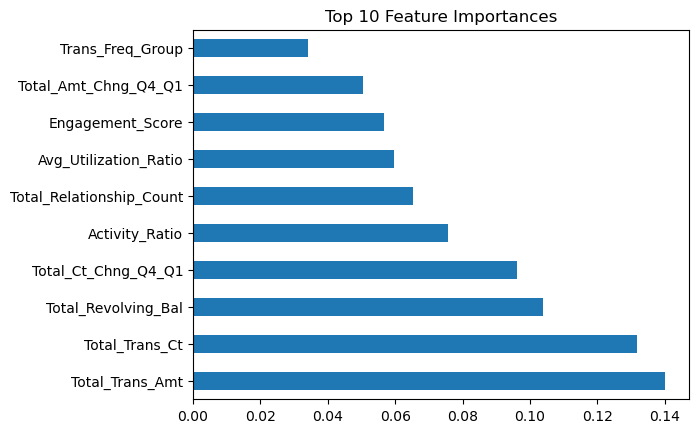

In [21]:
feature_importance.head(10).plot(kind="barh", title="Top 10 Feature Importances")

## Save Model

In [26]:
joblib.dump(best_model, "../models/churn_model.pkl")

['../models/churn_model.pkl']

## Confusion Matrix

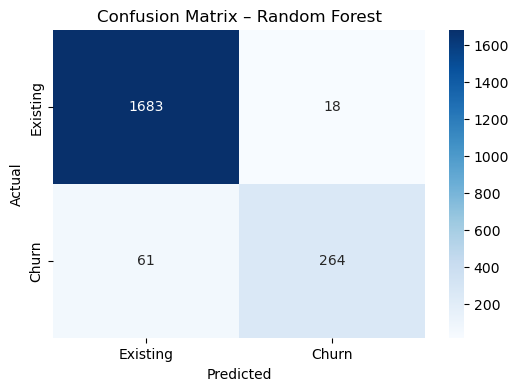

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Existing", "Churn"],
    yticklabels=["Existing", "Churn"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()
